In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=96e79007f97816e393b251b7ae95814250b5a23963721cfc0849804974110d4b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


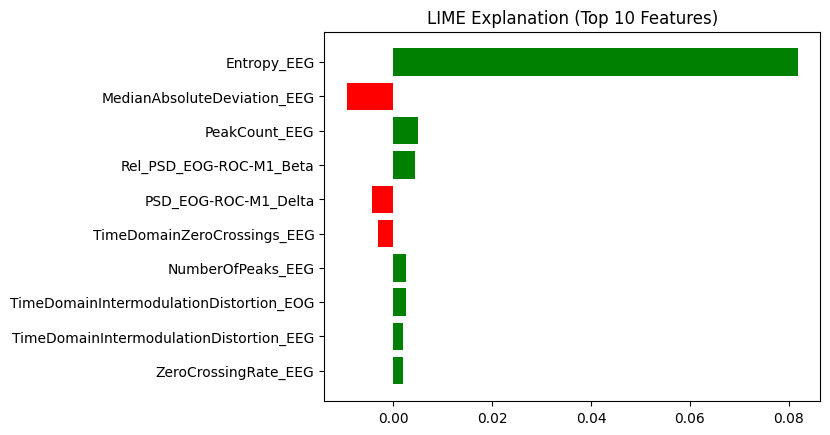

LIME feature importance saved to '/content/drive/MyDrive/lime_feature_importance.xlsx'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/content/drive/MyDrive/hand_crafted_feature_equal_shape_updated.xlsx'  # Adjust file path
sheet_name = '(Standardized)_All_Features'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract features and target variable
X = df.drop(columns=['Labels'])
y = df['Labels']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Set up the LIME explainer (no discretization because data is standardized)
explainer = LimeTabularExplainer(
    X_train,
    feature_names=X.columns.tolist(),
    class_names=[str(cls) for cls in np.unique(y_train)],
    mode="classification",
    discretize_continuous=False
)

# Select a random instance from the test set for explanation
instance_idx = np.random.randint(0, X_test.shape[0])
instance = X_test[instance_idx]

# Generate LIME explanation for the selected instance
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=10)

# Plot the LIME explanation (top 10 features)
fig = explanation.as_pyplot_figure()
plt.title("LIME Explanation (Top 10 Features)")
plt.show()

# Extract feature names and their LIME scores properly
feature_weights = explanation.local_exp[explanation.available_labels()[0]]

# Create a DataFrame to store the results
lime_results = pd.DataFrame({
    'Feature': [X.columns[i] for i, _ in feature_weights],
    'LIME Score': [score for _, score in feature_weights]
})

# Save the LIME results to an Excel file
output_file = '/content/drive/MyDrive/lime_feature_importance.xlsx'
lime_results.to_excel(output_file, index=False)

print(f"LIME feature importance saved to '{output_file}'")


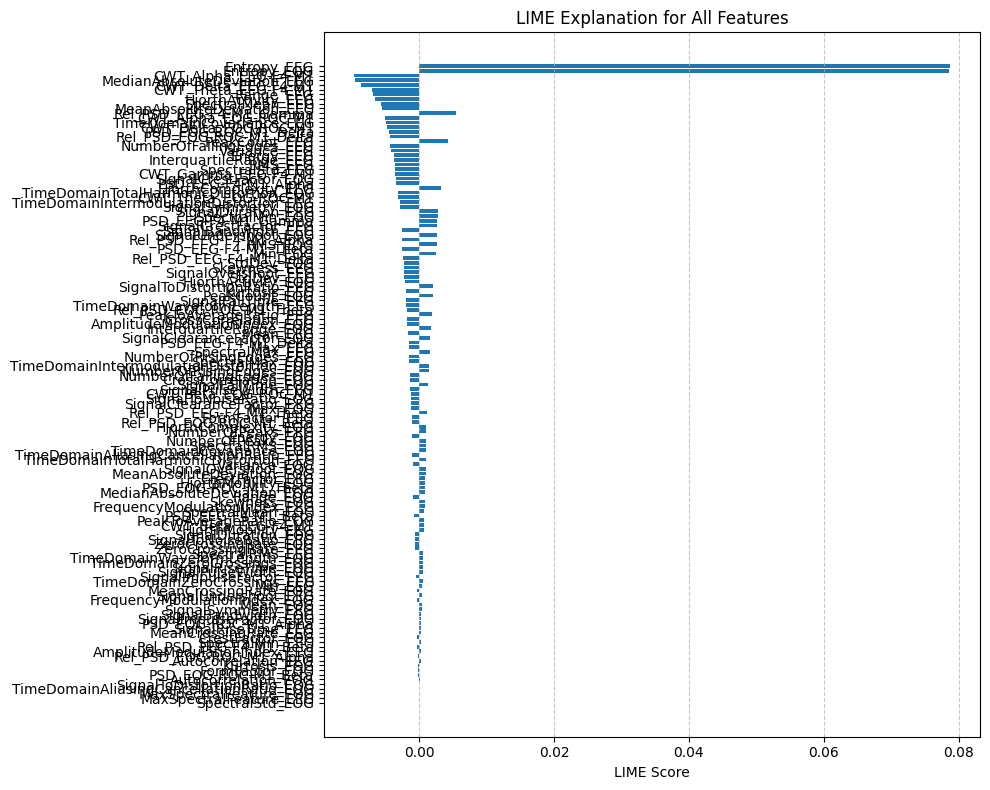

LIME feature importance (all features) saved to '/content/drive/MyDrive/lime_all_feature_importance.xlsx'


In [ ]:
# File: /content/lime_full_feature_explanation.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
file_path = '/content/drive/MyDrive/hand_crafted_feature_equal_shape_updated.xlsx'
sheet_name = '(Standardized)_All_Features'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Separate features and target
X = df.drop(columns=['Labels'])
y = df['Labels']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Setup LIME explainer
explainer = LimeTabularExplainer(
    X_train,
    feature_names=X.columns.tolist(),
    class_names=[str(cls) for cls in np.unique(y_train)],
    mode="classification",
    discretize_continuous=False
)

# Pick a random instance from test set
instance_idx = np.random.randint(0, X_test.shape[0])
instance = X_test[instance_idx]

# Generate explanation with all features
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=len(X.columns))

# Extract feature weights
feature_weights = explanation.local_exp[explanation.available_labels()[0]]

# Create DataFrame with feature scores
lime_scores_df = pd.DataFrame({
    'Feature': [X.columns[i] for i, _ in feature_weights],
    'LIME Score': [score for _, score in feature_weights]
})

# Sort by absolute LIME score
lime_scores_df['Abs LIME Score'] = lime_scores_df['LIME Score'].abs()
lime_scores_df = lime_scores_df.sort_values(by='Abs LIME Score', ascending=False)

# Plot all feature scores
plt.figure(figsize=(10, 8))
plt.barh(lime_scores_df['Feature'], lime_scores_df['LIME Score'])
plt.xlabel('LIME Score')
plt.title('LIME Explanation for All Features')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# (Optional) Save to Excel
output_file = '/content/drive/MyDrive/lime_all_feature_importance.xlsx'
lime_scores_df.drop(columns='Abs LIME Score').to_excel(output_file, index=False)

print(f"LIME feature importance (all features) saved to '{output_file}'")

In [ ]:
# File: /content/lime_full_feature_explanation.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
file_path = '/content/drive/MyDrive/hand_crafted_feature_equal_shape_updated.xlsx'
sheet_name = '(Standardized)_All_Features'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Separate features and target
X = df.drop(columns=['Labels'])
y = df['Labels']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Setup LIME explainer
explainer = LimeTabularExplainer(
    X_train,
    feature_names=X.columns.tolist(),
    class_names=[str(cls) for cls in np.unique(y_train)],
    mode="classification",
    discretize_continuous=False
)

# Pick a random instance from test set
instance_idx = np.random.randint(0, X_test.shape[0])
instance = X_test[instance_idx]

# Generate explanation with all features
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=len(X.columns))

# Extract feature weights
feature_weights = explanation.local_exp[explanation.available_labels()[0]]

# Create DataFrame with feature scores
lime_scores_df = pd.DataFrame({
    'Feature': [X.columns[i] for i, _ in feature_weights],
    'LIME Score': [score for _, score in feature_weights]
})

# Sort by absolute LIME score
lime_scores_df['Abs LIME Score'] = lime_scores_df['LIME Score'].abs()
lime_scores_df = lime_scores_df.sort_values(by='Abs LIME Score', ascending=False)

# Plot all feature scores - High Quality
plt.figure(figsize=(12, 10), dpi=300)
plt.barh(lime_scores_df['Feature'], lime_scores_df['LIME Score'], edgecolor='black')
plt.xlabel('LIME Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('LIME Explanation for All Features', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# (Optional) Save to Excel
output_file = '/content/drive/MyDrive/lime_all_feature_importance.xlsx'
lime_scores_df.drop(columns='Abs LIME Score').to_excel(output_file, index=False)

print(f"LIME feature importance (all features) saved to '{output_file}'")

In [ ]:
# File: /content/lime_full_feature_explanation.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
file_path = '/content/drive/MyDrive/hand_crafted_feature_equal_shape_updated.xlsx'
sheet_name = '(Standardized)_All_Features'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Separate features and target
X = df.drop(columns=['Labels'])
y = df['Labels']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Setup LIME explainer
explainer = LimeTabularExplainer(
    X_train,
    feature_names=X.columns.tolist(),
    class_names=[str(cls) for cls in np.unique(y_train)],
    mode="classification",
    discretize_continuous=False
)

# Pick a random instance from test set
instance_idx = np.random.randint(0, X_test.shape[0])
instance = X_test[instance_idx]

# Generate explanation with all features
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=len(X.columns))

# Extract feature weights
feature_weights = explanation.local_exp[explanation.available_labels()[0]]

# Create DataFrame with feature scores
lime_scores_df = pd.DataFrame({
    'Feature': [X.columns[i] for i, _ in feature_weights],
    'LIME Score': [score for _, score in feature_weights]
})

# Sort by absolute LIME score
lime_scores_df['Abs LIME Score'] = lime_scores_df['LIME Score'].abs()
lime_scores_df = lime_scores_df.sort_values(by='Abs LIME Score', ascending=False)

# Plot all feature scores - Adjusted for Clarity and High Quality
num_features = lime_scores_df.shape[0]
fig_height = max(6, num_features * 0.4)

plt.figure(figsize=(12, fig_height), dpi=300)
plt.barh(lime_scores_df['Feature'], lime_scores_df['LIME Score'], edgecolor='black')
plt.xlabel('LIME Score', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('LIME Explanation for All Features', fontsize=18, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# (Optional) Save to Excel
output_file = '/content/drive/MyDrive/lime_all_feature_importance.xlsx'
lime_scores_df.drop(columns='Abs LIME Score').to_excel(output_file, index=False)

print(f"LIME feature importance (all features) saved to '{output_file}'")


LIME feature importance (all features) saved to '/content/drive/MyDrive/lime_all_feature_importance.xlsx'


In [ ]:
# Sort by absolute LIME score
lime_scores_df['Abs LIME Score'] = lime_scores_df['LIME Score'].abs()
lime_scores_df = lime_scores_df.sort_values(by='Abs LIME Score', ascending=False)

# Plot all feature scores - Adjusted for Clarity and High Quality
num_features = lime_scores_df.shape[0]
fig_height = max(6, num_features * 0.4)

plt.figure(figsize=(fig_height,12), dpi=300)
plt.barh(lime_scores_df['LIME Score'],lime_scores_df['Feature'], edgecolor='black')
plt.xlabel('LIME Score', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('LIME Explanation for All Features', fontsize=18, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# # (Optional) Save to Excel
# output_file = '/content/drive/MyDrive/lime_all_feature_importance.xlsx'
# lime_scores_df.drop(columns='Abs LIME Score').to_excel(output_file, index=False)

# print(f"LIME feature importance (all features) saved to '{output_file}'")


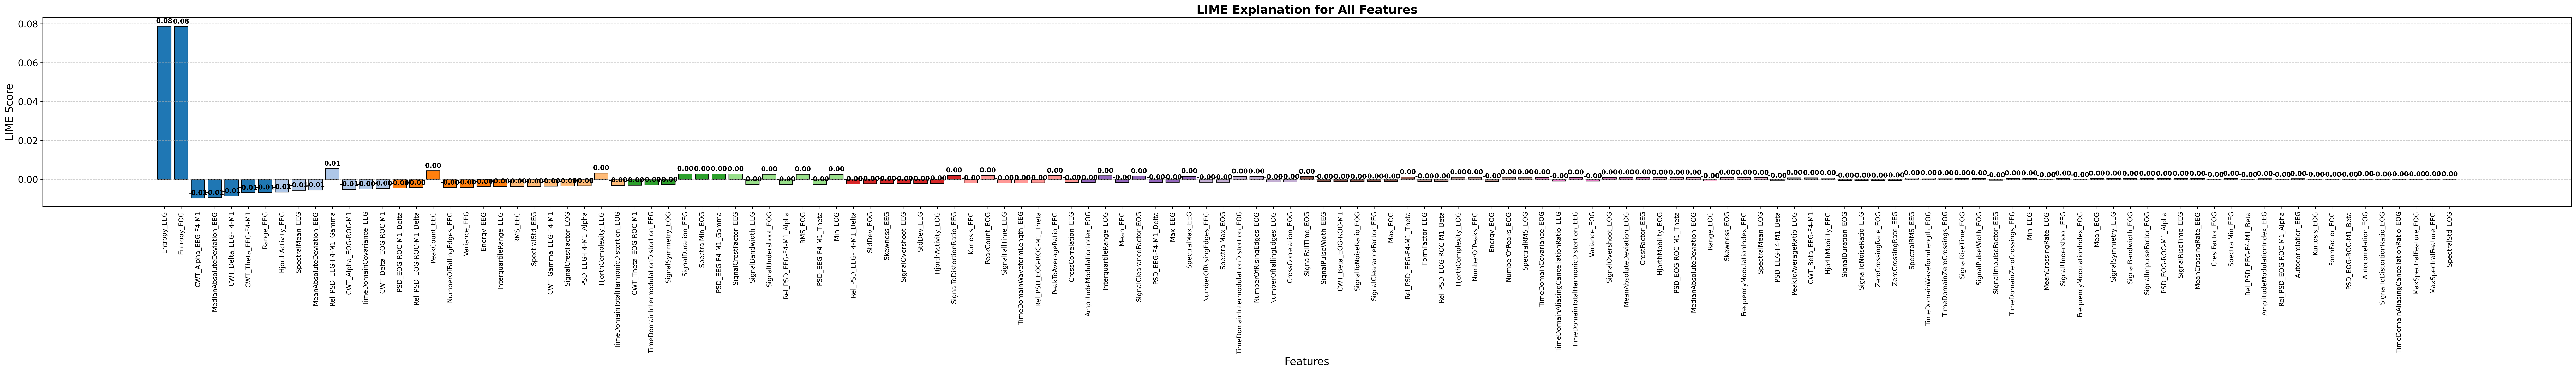

In [ ]:

# Plot all feature scores - Horizontal Plot with Features on X-axis
num_features = lime_scores_df.shape[0]
fig_width = max(12, num_features * 0.4)

plt.figure(figsize=(fig_width, 8), dpi=300)

# Generate a different color for each bar
colors = plt.cm.tab20(np.linspace(0, 1, num_features))

bars = plt.bar(
    lime_scores_df['Feature'],
    lime_scores_df['LIME Score'],
    edgecolor='black',
    color=colors
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + (0.01 * lime_scores_df['LIME Score'].max()),
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.ylabel('LIME Score', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.title('LIME Explanation for All Features', fontsize=18, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
